<a href="https://colab.research.google.com/github/Tarcisioms23/BRA-Reconstruindo/blob/master/TCC_PUC_MINAS_RECOMENDA%C3%87%C3%95ES_LIVROS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  ***Sistema de recomendação de livros*** 📖 


---

# 1. Definição do Problema




  - Usaremos um metodo de recomendação que é o filtragem 
baseada em colaboração para construir 2 soluções de sistemas de recomendação de livros e avaliar o desempenho dos resultados. 
   
   Iremos construir maquinas preditivas que com base nas escolhas de leituras de outras pessoas, o livro seja recomendado a outras pessoas com interesse semelhante.

  ## **1° Solução**    
      Se duas pessoa Avaliarem o mesmo livro, sera recomendado outros livros avaliados por ambos (Utilizaremos **NearestNeighbors**)

      Exemplo:

      Mauricio leu e gostou do livro: "A loja de tudo". 
      
      Fernanda: tambem leu e gostou desse livro

      Agora Mauricio leu e gostou do Livro "StartUp de U$100" que não é lido     pela Fernanda.

      Então temos que recomendar o Livro "Startup de U$100" para Fernanda.

  ## **2° Solução**

      Se uma pessoa avaliar um livro mais do que sua classificação média, então ela gosta do livro. (Utilizaremos **PCA e Kmeas**)

# 2. Dados Coletados

 - Nessa seção será realizado todos os tratamentos necessários para obter os dados da fonte.




**1. Dataset Books**


- A coleta foi realizada no Kaggle - https://www.kaggle.com/heryhelder/books-data

 * 
Este conjunto de dados é inspirado no Goodreads. Adicionados os gêneros de livros usando a API do Google . Conforme descrição no link.

**2. Dataset Users e Rating e ListBooks**

 -  
A coleta foi realizada no zenodo - http://www2.informatik.uni-freiburg.de/~cziegler/BX/
* 	
Coletado por Cai-Nicolas Ziegler da comunidade Book-Crossing com a gentil permissão de Ron Hornbaker, CTO da Humankind Systems . Contém 278.858 usuários (anônimos mas com informações demográficas) fornecendo 1.149.780 avaliações (explícitas/implícitas) sobre 271.379 livros.
.

## 2.1 Importação de Bibliotecas

In [59]:
# 1. Importando Bibliotecas
#import json
import pandas as pd # lib pandas
import numpy as np # lib numpy
import datetime # lib datetime

from IPython.display import Image,display                        #Lib de cálculo e visualização
from IPython.core.display import HTML                            #Ferramenta de cálculo e visualização


import seaborn as sns                                            #Lib de visualização para plotagem de gráficos estatísticos
from mpl_toolkits.mplot3d import Axes3D                          #Fiblioteca de utilitário de visualização
from scipy.sparse import csr_matrix

# lib sklearn
from sklearn.cluster import KMeans                               #Lib Kmeans
from sklearn.decomposition import PCA                            #Lib de análise de componentes principais
from sklearn.metrics import silhouette_score ,silhouette_samples #Lib avalia algoritmos de clusterização
from sklearn.neighbors import NearestNeighbors                   #lib NearestNeighbors
from sklearn.model_selection import train_test_split             # lib para definir os dados de treino e de teste


# Lib Necessário para visualização automática dos gráficos
import matplotlib.pyplot as plt                                  #Lib  matplotlib
import matplotlib.cm as cm                                       #Lib  conjunto de mapas de cores
import cufflinks as cf # para conectar o plotly ao pandas

#bibliotecas para trabalhar offline com a biblioteca no Colab
import plotly                                                     
import plotly.offline as py
import plotly.graph_objs as go # criará de fato os gráficos
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import plot, iplot
pio.renderers.default = "colab"


 ## 2.1  Iniciado a importação dos dados

  Nesse ponto iremos realizar as importação dos arquivos CVS e nomear da   seguinte forma:

 
     1. list_books - Nome do Arquivo - Books.csv (List extensa de livros)
     2. books - Nome do Arquivo - books_data.csv (Dados para enriquecimento de Genero do livro -GoodReads)
     3. ratings - Nome do Arquivo - BX-Ratings.csv (Dados de avaliações de usuario
     4. users - Nome do Arquivo - BX-Users.csv (Dados dos usuarios)


In [60]:
# 2. Importação do Dataset Books
list_books = pd.read_csv("BX-Books.csv", sep=';', encoding='latin-1', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.



b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 

Importação do Dataset Books

In [61]:
books = pd.read_csv("books_data.csv", sep=',', encoding='latin-1', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





Importação do Dataset Users

In [62]:
users = pd.read_csv("BX-Users.csv", sep=';', encoding='latin-1', error_bad_lines=False)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





Importação do Dataset Avaliações

In [63]:

ratings = pd.read_csv("BX-Book-Ratings.csv", sep=';', encoding='latin-1', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





# 3° Tratamento dos Dados

Nessa seção é analisado os dados que são necessários para continuidade do trabalho. Os dados necessários serão formatados e/ou utilizado filtros se necessário. Os dados que não forem necessários serão removidos

## 3.1 Vizualizando informações do dataframe.

  Para validarmos se a importação aconteceu corretamente.
  Conhecer os campos que temos no dataframe e suas tipologias é um passe importante.

In [64]:
# Visualizando informações sobre os dados antes da formatação
list_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [65]:
# Visualizando informações sobre os dados antes da formatação
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111436 entries, 0 to 111435
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   111436 non-null  int64 
 1   Name         111436 non-null  object
 2   Authors      111436 non-null  object
 3   ISBN         111436 non-null  object
 4   PublishYear  111436 non-null  int64 
 5   Language     111436 non-null  object
 6   Description  111436 non-null  object
 7   Genres       111436 non-null  object
dtypes: int64(2), object(6)
memory usage: 6.8+ MB


In [66]:
# Visualizando informações sobre os dados antes da formatação
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [67]:
# Visualizando informações sobre os dados antes da formatação
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


##3.2 Quantiade de linhas de cada dataframes.

Realizei a analise de quantidade de linhas e colunas por Dataframe

In [68]:
# Quantidades da primeira lista de Livros 
nRow, nCol = list_books.shape
print(f'Quantidade de livros cadastrados {nRow} ')
print(f'Quantidade de colunas {nCol} ')

Quantidade de livros cadastrados 271360 
Quantidade de colunas 8 


In [69]:
# Quantidades segunda lista de Livros  
nRow, nCol = books.shape
print(f'Quantidade de livros cadastrados {nRow} ')
print(f'Quantidade de colunas {nCol} ')

Quantidade de livros cadastrados 111436 
Quantidade de colunas 8 


In [70]:
# Quantidades de Usuarios 
nRow, nCol = users.shape
print(f'Quantidade de usuarios cadastrados {nRow}  ')
print(f'Quantidade de colunas {nCol} ')

Quantidade de usuarios cadastrados 278858  
Quantidade de colunas 3 


In [71]:
# Quantidades de Avaliações 
# Quantidades de Usuarios 
nRow, nCol = ratings.shape
print(f'Quantidade de avaliações cadastrados {nRow}')
print(f'Quantidade de colunas {nCol} ')

Quantidade de avaliações cadastrados 1149780
Quantidade de colunas 3 


## 3.3 Visualizando os dados e compreendo a aparência dos dados 

In [72]:
#Vamos dar uma olhada rápida na aparência dos dados de Livros:
list_books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [73]:
#Vamos dar uma olhada rápida na aparência dos dados de Livros:
books.head(5)

,Unnamed: 0,Name,Authors,ISBN,PublishYear,Language,Description,Genres
0,0,Haroun and the Sea of Stories,Salman Rushdie,0613495632,1991,eng,The author of The Satanic Verses returns with ...,['Fiction']
1,1,The Desire and Pursuit of the Whole: A Romance...,Frederick Rolfe,0306802589,1988,eng,<i>The Desire and Pursuit of the Whole</i> sta...,['Fiction']
2,2,"Green Arrow, Vol. 2: Sounds of Violence",Kevin Smith,1401200451,2004,eng,The reinvention of a classic comics character ...,"['Comic books, strips, etc']"
3,3,"Trojan Odyssey (Dirk Pitt, #17)",Clive Cussler,0399150803,2003,eng,Long hailed as the grand master of adventure f...,['Fiction']
4,4,"Strontium Dog: Search/Destroy Agency Files, Vo...",John Wagner,1905437153,2007,eng,"Earth, the late 22nd century. Following the at...",['Bounty hunters']


In [74]:
#Vamos dar uma olhada rápida na aparência dos usuarios:
users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [75]:
#Vamos dar uma olhada rápida na aparência dos dados das avaliações:
ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


##3.4 Removendo Colunas

  Aqui estou deletando as linhas que nao irei utilizar dos dataframes

In [76]:
#books
del books['Unnamed: 0'] # Coluna de index

#Lista Books
del list_books['Image-URL-M'] # Coluna img
del list_books['Image-URL-S'] #  Coluna img
del list_books['Image-URL-L'] #  Coluna img


##3.5 Unindo as Tabelas de Livros
Aqui vamos realizar um merge nos dataframe books e list_books para enriquecer nossos dados de livros.
Foi feito o Merge pelo identificador 'ISBN'.
 
 Apos o Merge - podemos observar como os dados estão no dataFrame books

In [77]:
books = list_books.merge(books, on='ISBN', how='left')
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271360 entries, 0 to 271359
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271360 non-null  object 
 1   Book-Title           271360 non-null  object 
 2   Book-Author          271359 non-null  object 
 3   Year-Of-Publication  271360 non-null  object 
 4   Publisher            271358 non-null  object 
 5   Name                 20669 non-null   object 
 6   Authors              20669 non-null   object 
 7   PublishYear          20669 non-null   float64
 8   Language             20669 non-null   object 
 9   Description          20669 non-null   object 
 10  Genres               20669 non-null   object 
dtypes: float64(1), object(10)
memory usage: 24.8+ MB


##3.6 Manters somente os campos do dataFrame books



- Deixaremos somente os campos:
  - ISBN
 - Book-Title
 - Book-Author
 - Year-Of-Publication
 - Publisher 
 - Description 
 - Genres

In [78]:
#Iremos mantes somente os campos abaixo

##Incluindo somente os campos necessario
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Description', 'Genres']]
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271360 entries, 0 to 271359
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Description          20669 non-null   object
 6   Genres               20669 non-null   object
dtypes: object(7)
memory usage: 16.6+ MB


## 3.7 Renomeando colunas para padronização 


- Lista de renomeação DataFrame Books
 - ISBN - Mantem: **ISBN**
 - Book-Title - **title**
 - Book-Author - **author**
 - Year-Of-Publication - **year_publisher**
 - Publisher - **publisher**
 - Genres - **genres**

In [79]:
#Renomeando Colunas list Books
books.rename(columns = {'Book-Title':'title', 
                        'Book-Author':'author', 
                        'Year-Of-Publication':'year_publisher', 
                        'Publisher' : 'publisher',
                        'Genres':'genres'
                        }, inplace=True)


 - Validando a alteração no dataFrame Books

In [80]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271360 entries, 0 to 271359
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ISBN            271360 non-null  object
 1   title           271360 non-null  object
 2   author          271359 non-null  object
 3   year_publisher  271360 non-null  object
 4   publisher       271358 non-null  object
 5   Description     20669 non-null   object
 6   genres          20669 non-null   object
dtypes: object(7)
memory usage: 16.6+ MB


Lista de renomeação DataFrame users

- Lista de renomeação DataFrame users
 - User-ID -: **user_id**
 - Location - **location**
 - Age - **age**

In [81]:
#Renomeando Colunas list users
users.rename(columns = {'User-ID': 'user_id', 
                        'Location': 'location', 
                        'Age':'age'}, inplace=True)



 - Validando a alteração users

In [82]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Lista de renomeação DataFrame ratings

- Lista de renomeação DataFrame users
 - User-ID -: **user_id**
 - Book-Rating - **rating**

In [83]:
#Renomeando Colunas list rating
ratings.rename(columns = {'User-ID':'user_id', 
                          'Book-Rating': 'rating'}, inplace=True)

Validando as alterações de users

In [84]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1149780 non-null  int64 
 1   ISBN     1149780 non-null  object
 2   rating   1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


#4. Análise e Exploração dos Dados

Nessa seção será feito uma análise sobre os dados coletados. 

## 4.1 Uma pré analise para exploração

Iremos fazer uma pré analise para darmos inicio a exploração dos dados.

 ### 4.1.1 Analisando o campo numerico **year_publisher**  conjunto de dados books
 
 O campo contem o ano de publicação.

In [85]:
### Analisando o campo **year_publisher**  conjunto de dados books, campo contem o ano de publicação.
books['year_publisher'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

 - Como pode ser visto acima, existem algumas entradas incorretas neste campo. Parece que os nomes dos editores 'DK Publishing Inc' e 'Gallimard' foram carregados incorretamente como yearOfPublication 

In [86]:
books.loc[books.year_publisher == 'DK Publishing Inc',:]

,ISBN,title,author,year_publisher,publisher,Description,genres
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,NaN,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,NaN,NaN


In [87]:
books.loc[books.year_publisher == 'Gallimard',:]

,ISBN,title,author,year_publisher,publisher,Description,genres
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,NaN,NaN


 - Como não temos o ano de publicação em nenhuma linha da DK Publishing Inc e da Gallimard, descartaremos essas linhas do conjunto de dados original

In [88]:
books = books[(books.year_publisher != 'DK Publishing Inc')
              & (books.year_publisher != 'Gallimard')]

 - Podemos observar a exclusão dos dados

In [89]:
books['year_publisher'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

 - Alterando o campo year_publisher para numerico 

In [90]:
books['year_publisher'] = pd.to_numeric(books['year_publisher'])
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271357 entries, 0 to 271359
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ISBN            271357 non-null  object
 1   title           271357 non-null  object
 2   author          271356 non-null  object
 3   year_publisher  271357 non-null  int64 
 4   publisher       271355 non-null  object
 5   Description     20669 non-null   object
 6   genres          20669 non-null   object
dtypes: int64(1), object(6)
memory usage: 16.6+ MB


- Podemos observar no grafico abaixo que alguns dados possuem ano de publicação fora de padrao.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



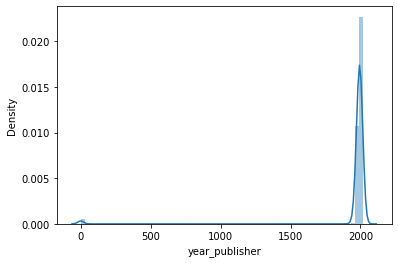

In [91]:
#Analisar dados demográficos do ano de publicação dos livros
sns.distplot(books['year_publisher'],bins=70);

 - Podemos observar aqui que datas fora do padrao como 0 e 2050 


In [92]:
# Ano de publição 50 a 20040
books['year_publisher'].describe()

count    271357.000000
mean       1959.760817
std         257.994226
min           0.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2050.000000
Name: year_publisher, dtype: float64

 - Para isso iremo fazer uma filtragem no periodo de 1950 a 2020

In [93]:
# Pegaremos os livros com o periodo de 1950 a 2020
books = books[(books['year_publisher']>=1950) & (books['year_publisher']<=2020)]
#Apresentando no Grafico
books['year_publisher'].describe()

count    266432.000000
mean       1993.760179
std           7.873474
min        1950.000000
25%        1989.000000
50%        1996.000000
75%        2000.000000
max        2020.000000
Name: year_publisher, dtype: float64

###4.1.2 Também realizei uma avaliação nos dados do usuario no **conjunto de dados users**, no grafico abaixo mostra idades irregulares.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



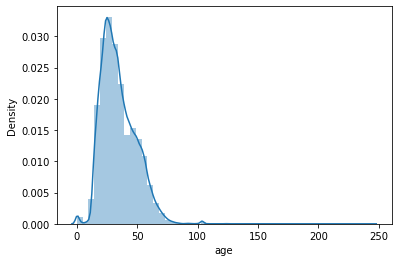

In [94]:
#Verificando idade de usuarios cadastrados
sns.distplot(users.age);


 - Entao vamos filtrar os usuarios que possuem idade entre 15 a 100

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



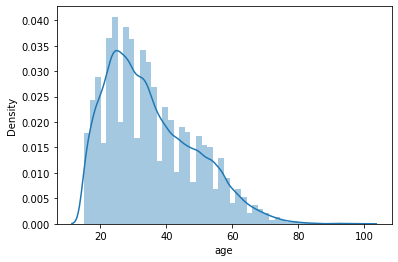

In [95]:
#Limpando usuarios invalidos e pegando no periodo de 15 anos a 100.
users = users[(users.age>=15) & (users.age<=100)]
sns.distplot(users.age)

### 4.1.3 Limpando avaliações inoperantes

Iremos limpar avaliações que nao possuem cadastro de livros e nem usuario cadastrado. Pois não a necessidade de mantes os dados de avaliações e não encontrar os livros.

In [96]:
#Limpando AVALIAÇÕES pelo INSB  que nao possuem Livros cadastrados
print("ratings antes de limpar:",ratings.shape)
ratings = ratings[ratings['ISBN'].isin(list(books['ISBN'].unique()))]

#Limpando avaliações pelo INSB que nao possuem usuarios cadastrados
ratings = ratings[ratings['user_id'].isin(list(users['user_id'].unique()))]
print("ratings após a limpeza:",ratings.shape)


ratings antes de limpar: (1149780, 3)
ratings após a limpeza: (729055, 3)


## 4. 2 Descrição e Exploração de informações
(Observação: Nessa fase do projeto irei tratar os problemas separadamente. Para facilitar na organização do projeto.

### 4.2.1 Regra de negocio para algoritimo (NearestNeighbors) - Para nosso Primeiro problema vamos relembrar:



 **1° Problema**


Se duas pessoa Avaliarem o mesmo livro, sera recomendado outros livros avaliados por ambos (Utilizaremos NearestNeighbors)

Exemplo:

Mauricio leu e gostou do livro: "A loja de tudo".

Fernanda: tambem leu e gostou desse livro

Agora Mauricio leu e gostou do Livro "StartUp de U$100" que não é lido pela Fernanda.

Então temos que recomendar o Livro "Startup de U$100" para Fernanda

1 - Decisão de negocio para esse problema:
  - Iremos recomendar os livros que foram mais avaliados correspondentes as pessoas que também avaliou o livro escolhido.

    - Para isso iremos criar a coluna de quantidade de avaliações por livro. Pois queremos pegar os livros mais populares.

#### 4.2.1.1 Antes irei juntar as tabelas rating e books 

In [97]:
#Realizando a junção das tabelas rating e books
rating_books = ratings.merge(books, on='ISBN')
rating_books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729055 entries, 0 to 729054
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         729055 non-null  int64 
 1   ISBN            729055 non-null  object
 2   rating          729055 non-null  int64 
 3   title           729055 non-null  object
 4   author          729054 non-null  object
 5   year_publisher  729055 non-null  int64 
 6   publisher       729053 non-null  object
 7   Description     89094 non-null   object
 8   genres          89094 non-null   object
dtypes: int64(3), object(6)
memory usage: 55.6+ MB


####4.2.1.2 Agora sim iremos criar o campo de quantidade de avaliações para termos os livros mais populares.

- Criando a variavel que ira armazenar o campo de quantidade de avaliação


In [98]:
# Para criarmos o campo de qtd de rating
var_qtd_ratings =  rating_books.groupby('ISBN')['rating'].count()

 - Para conseguir identificar de qual livro se trata a quantidade da avaliação, alterei o index para 'ISBN' identificar do Livro

In [99]:
# alterei o index para mesclar a coluna com a tabela.
rating_books = rating_books.set_index('ISBN')


 - Nesse ponto juntei o campo qtd_ratings com o nosso conjuntos de dados ratings_books

In [100]:
#Criando coluna de quantidade de avaliações 
rating_books['qtd_ratings'] = var_qtd_ratings


 - Retomei o index para o padrão e podemos observar o retorno das avaliações

In [101]:
rating_books.reset_index(inplace=True)
rating_books['qtd_ratings'].unique()

array([  70,    1,    3,   49,   63,   18,   66,   33,   86,  161,    9,
         35,  112,    2,    4,    7,  101,    5,   26,   37,   31,   11,
         44,    6,   23,   16,   47,  206,   27,   13,   10,   12,   14,
          8,   19,   15,   46,   21,   45,   25,   61,   28,  133,   20,
        908,  684,   29,   17,   39,  359, 2092,   62,  135,   34,  392,
         32,  265,   65,   22,  122,  273,   24,   79,   59,   51,   96,
        105,   52,   60,   43,  165,  223,   72,   41,  120,  113,   83,
         64,  251,   71,  144,   77,  138,   67,  162,   94,   56,  147,
        149,  110,  268,  178,   42,   53,   40,  109,  259,  127,  136,
        142,   82,   85,  183,  221,  338,  204,  184,   36,  181,  134,
        115,  296,   88,  160,   84,  306,   50,  370,  470,  123,  198,
         76,  211,  318,   38,  231,  174,  129,  100,  441,  153,  240,
        250,  272,   80,   69,   95,   55,  267,  163,  111,  103,  116,
         54,  248,   68,   57,  106,   93,   97,  1

Podemos observar no grafico abaixo que possui livros que posssuem mais de 2000, apresentado uma anomalia.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



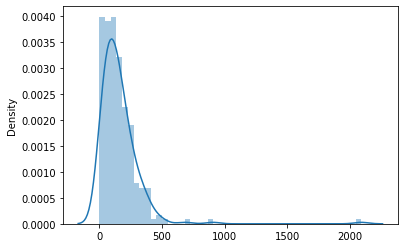

In [102]:
sns.distplot(rating_books.qtd_ratings.unique());

####4.2.1.3 Regra de negocio: Manter os usuários que gostam de mais de 50 livros e menos de 200 livros
O limite de 200 foi usado para normalizar os dados para facilitar e explicitar os grupos(Remoção do outliers)
  - Com isso iremos excluir o valor anômalo sem causar grandes prejuízos à análise de dados e observar a quantidade apos filtragem


In [103]:
print("Antes de limpar o conjunto de dados rating_books: ",rating_books.shape)
val = rating_books['qtd_ratings']
list_to_keep = list(val[(val>50) & (val<200)].index)
rating_books = rating_books[rating_books['user_id'].isin(list_to_keep)]
print("Depois de limpar o conjunto de dados rating_books: ",rating_books.shape)

Antes de limpar o conjunto de dados rating_books:  (729055, 10)
Depois de limpar o conjunto de dados rating_books:  (249598, 10)


####4.2.1.4 Agora iremos analisar a média de avaliação por usuario


 - Iremos pegar a media por usuario de avaliações

In [104]:
v_rating_mean = rating_books.groupby('user_id')['rating'].mean()

 - Incluindo media geral no nosso conjunto de dados: ratings_books



In [105]:
# Criando media geral 
v_rating_mean = rating_books.groupby('user_id')['rating'].mean()
# alterei o index para mesclar a coluna com a tabela.
rating_books = rating_books.set_index('user_id')
# Criando coluna de media de avaliação e atribuindo o valor da media
rating_books['mean_rating'] = v_rating_mean
#Retomado indice padrao
rating_books.reset_index(inplace=True)
rating_books.head(3)

,user_id,ISBN,rating,title,author,year_publisher,publisher,Description,genres,qtd_ratings,mean_rating
0,638,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,NaN,NaN,70,6.863014
1,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,NaN,NaN,70,1.037688
2,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,NaN,NaN,70,0.974970


#### 4.2.1.5 - Manter os livros que foram avaliados acimas da media de avaliação do usuario.

In [106]:
# Manter os livros em que os usuários "gosta" acima da media.
rating_books = rating_books[rating_books['rating'] > rating_books['mean_rating']]

In [107]:
#Vamos descartar os valores duplicados, porque se o mesmo usuario tiver avaliado o mesmo livro varias vezes.
# Filtragem
print("Qtd do Conjunto de dados rating_books antes de limpar: ",rating_books.shape)
rating_books.drop_duplicates(['user_id', 'ISBN'], inplace=True)
rating_books.shape
print("Depois de limpar o conjunto de dados rating_books: ",rating_books.shape)

Qtd do Conjunto de dados rating_books antes de limpar:  (78164, 11)
Depois de limpar o conjunto de dados rating_books:  (78164, 11)


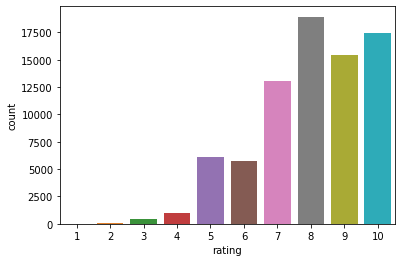

In [108]:
#plotting count of bookRating - ESTATISCA DESCRITIVA PARA CONFIRMAR OS DADOS FINAIS.
sns.countplot(data=rating_books , x='rating')
plt.show();

 #### 4.2.1.6 Aqui vou manter as colunas que irei utilizar 

 - Visualizando os campos e deixarei somente os necessarios para minha primeira maquina preditiva


In [109]:
rating_books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78164 entries, 1 to 249597
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         78164 non-null  int64  
 1   ISBN            78164 non-null  object 
 2   rating          78164 non-null  int64  
 3   title           78164 non-null  object 
 4   author          78164 non-null  object 
 5   year_publisher  78164 non-null  int64  
 6   publisher       78162 non-null  object 
 7   Description     9244 non-null   object 
 8   genres          9244 non-null   object 
 9   qtd_ratings     78164 non-null  int64  
 10  mean_rating     78164 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 9.2+ MB


In [118]:
rating_books = rating_books[['ISBN', 'user_id','title', 'author', 'rating', 'mean_rating', 'genres', 'qtd_ratings']]

####4.2.1.6 Criando o PIVOT_TABLE para problema 1.
  -  Para tabulação cruzada que agrega apenas por contagem, Uma tabela dinâmica pode ajudar a resumir rapidamente os dados e destacar as informações desejadas
  - Antes de Criar a maquina irei fazer um Pivo_table - para transpor os usuario em coluna ao inves de linhas, por que as avaliações dadas por eles sera  as variaveis da maquina preditiva.

In [113]:
# Juntando a tabela de livros com os ratings com a tabela de quantidade de ratings por livro
%%time
# CrossTab agrupando registros index é o title e as Colunas são user_id
book_pivot = rating_books.pivot_table(columns='user_id', index='title', values='rating')
#Transformando em 0 o nulo
book_pivot.fillna(0, inplace=True)

CPU times: user 9.65 s, sys: 4.69 s, total: 14.3 s
Wall time: 14.2 s


### 4.2.2 - Regras de negocio (PCA e Kmeas) para nossa segundo problema, vamos relembrar.

 - Se uma pessoa avaliar um livro mais do que sua classificação média, então ela gosta do livro. (Utilizaremos PCA e Kmeas)

Observação: como ja fizemos todo tratamento, analise e exploração dos dados.
Vamos aproveitar o conjunto de dados tratado (rating_books) para realizar o tratamento desse 2º problema.

 - Para isso iremos criar uma no tabela onde iremos filtrar somente os campos que iremos utilizar

In [120]:
user_rating = rating_books[['ISBN', 'user_id', 'rating', 'mean_rating', 'is_fav']]


KeyError: ignored

In [ ]:
# Inicializando uma variável fictícia para uso futuro
user_rating['is_fav'] = 1
print(user_rating.shape)
user_rating.head()

In [ ]:
user_rating.shape

#5. Criação de Modelos de Machine Learning

###5.1 Busca colaborativa com NearestNeighbors
 - Nessa solução iremos recomendar os livros mais recomendados por outros usuarios.

Essa tecnica NearestNeighbors é utilizada para medir a distancia.
Então irei utilizar essa tecninca para gerar scores para sugestões de livros. 

Calcularemos os vizinhos mais próximos usando o algoritmo Brute e especificamos a métrica como um cosseno, para que o algoritmo calcule a similaridade do cosseno entre os vetores de classificação. Ajustando o modelo...

**(Cosseno: Para facilitar o calculo da distancia a gente projeta a serie de dados em um cosseno)**




 - Como a NearestNeighbors não esta sendo usado como uma tecninca preditiva por isso não existe a necessidade de fluxo de treinamento da tecnica.

In [157]:
book_sparse = csr_matrix(book_pivot)
model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [158]:
#Testando nosso modelo de recomendação
query_index = np.random.choice(book_pivot.shape[0])
distances, indices = model.kneighbors(book_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 5)
v_array_livro = []
v_array_dist = []


for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recomendações para {0}:\n'.format(book_pivot.index[query_index]))
        livro_selecionado = (book_pivot.index[query_index])
    else:
      
        v_array_livro.append(book_pivot.index[indices.flatten()[i]])
        v_array_dist.append(distances.flatten()[i])
        print('{0}: {1}, com distância de {2}:'.format(i, book_pivot.index[indices.flatten()[i]], distances.flatten()[i]))
       

Recomendações para Siddhartha:

1: Nausea (New Directions Paperbook), com distância de 0.4917707917769991:
2: John Glenn: A Memoir, com distância de 0.4931901862720397:
3: Heart of Darkness: With the Congo Diary (Penguin Twentieth-Century Classics), com distância de 0.5008210186162771:
4: Beneath the Wheel, com distância de 0.5348231507243899:


In [159]:
 df_livro_distancia = pd.DataFrame(v_array_livro,  columns=['title'])
 df_livro_distancia ['distant'] = v_array_dist
 

 # plotando gráfico de barras verticais
trace0 = go.Bar(y=df_livro_distancia.title,
                x=df_livro_distancia.distant ,
                marker = {'color': '#00FF2b'},
                orientation='h',
                opacity= 0.7
              )

data = [trace0]

# criando layout
configuracoes_layout = go.Layout(title=f'Recomendações para: {livro_selecionado}',
                   xaxis=dict(
                         titlefont=dict(
                                   size=40,
                                   color='lightgrey'),
                   tickangle=90),
                   yaxis={'title': 'livros'})

# figura

fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico
py.iplot(fig)

In [160]:
#Testando nosso modelo de recomendação
query_index = np.random.choice(book_pivot.shape[0])
distances, indices = model.kneighbors(book_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 6)
v_array_livro = []
v_array_dist = []


for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recomendações para {0}:\n'.format(book_pivot.index[query_index]))
        livro_selecionado = (book_pivot.index[query_index])
    else:
      
        v_array_livro.append(book_pivot.index[indices.flatten()[i]])
        v_array_dist.append(distances.flatten()[i])
        print('{0}: {1}, com distância de {2}:'.format(i, book_pivot.index[indices.flatten()[i]], distances.flatten()[i]))
       

Recomendações para Why People Believe Weird Things: Pseudoscience, Superstition, and Other Confusions of Our Time:

1: The Gui Style Guide, com distância de 0.0:
2: Home Design With Feng Shui A-Z (Hay House Lifestyles), com distância de 0.0:
3: Alvin Journeyman: The Tales of Alvin Maker IV (The Tales of Alvin Maker, 4), com distância de 0.0:
4: Falling Up the Stairs, com distância de 0.0:
5: Special Effects, com distância de 0.0:


In [161]:
 df_livro_distancia = pd.DataFrame(v_array_livro,  columns=['title'])
 df_livro_distancia ['distant'] = v_array_dist
 

 # plotando gráfico de barras verticais
trace0 = go.Bar(y=df_livro_distancia.title,
                x=df_livro_distancia.distant ,
                marker = {'color': '#00FF2b'},
                orientation='h',
                opacity= 0.7
              )

data = [trace0]

# criando layout
configuracoes_layout = go.Layout(title=f'Recomendações para: {livro_selecionado}',
                   xaxis=dict(
                         titlefont=dict(
                                   size=40,
                                   color='lightgrey'),
                   tickangle=90),
                   yaxis={'title': 'livros'})

# figura

fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico
py.iplot(fig)

###5.2 Busca colaborativa com K-MEANS e PCA

Calcularemos os vizinhos mais próximos usando o algoritmo Brute e especificamos a métrica como um cosseno, para que o algoritmo calcule a similaridade do cosseno entre os vetores de classificação. Ajustando o modelo...

 - Antes de Criar a maquina irei fazer um Pivo_table - para transpor os livros em coluna ao inves de linhas, por que as avaliações dadas por eles sera  as variaveis da maquina preditiva.

In [256]:
user_rating.describe()

,user_id,rating,mean_rating,is_fav
count,78164.000000,78164.000000,78164.000000,78164.0
mean,114601.093291,8.009928,4.152180,1.0
std,69300.694981,1.626051,2.186049,0.0
min,44.000000,1.000000,0.025413,1.0
25%,59192.000000,7.000000,2.462190,1.0
50%,98536.000000,8.000000,3.731579,1.0
75%,168971.000000,9.000000,5.600000,1.0
max,278554.000000,10.000000,9.904762,1.0


In [2]:
%%time
df = pd.pivot_table(user_rating,index='user_id',columns='ISBN',values='is_fav')
df.fillna(value=0,inplace=True)
print(df.shape)
df.head(10)

NameError: ignored

In [1]:
print(df.shape) 
df.head(2)

NameError: ignored

 - Aplicando o PCA
 
 A Análise de Componentes Principais (PCA) é uma abordagem de redução de dimensionalidade que tenta encontrar o melhor subespaço possível que explica a maior parte da variação dos dados. Ele funciona derivando componentes dos recursos dimensionados originais. A partir desses componentes, os dois mais significativos são normalmente plotados, representando o espaço de dados simplificado.


 
    Depois de ajustar um objeto PCA à matriz padronizada, podemos ver quanto da variação é explicada por cada uma das características.

In [ ]:
# Aplica redução de dimensonalidade das variaveis - Aplicando maquina preditiva de segmentação de usuario
# Ele valida a correlação das variaveis - de acordo com a semelhança ele vai agrupando as variaveis
%%time
pca = PCA(n_components=3) # 3 COMPONENTES PRINCIPAIS
pca.fit(df)
pca_fit = pca.transform(df) # Realiza o fitTransforme com nossa tabela

In [151]:
pca_fit = pd.DataFrame(pca_fit,index=df.index)
pca_fit.head(5)

,0,1,2
user_id,,,
254,0.759339,1.347071,-1.202834
638,0.360465,-0.126817,-0.307245
1733,-0.256087,0.061572,0.303742
2766,0.074804,0.033281,0.127387
2977,0.044230,-0.210661,-0.135262


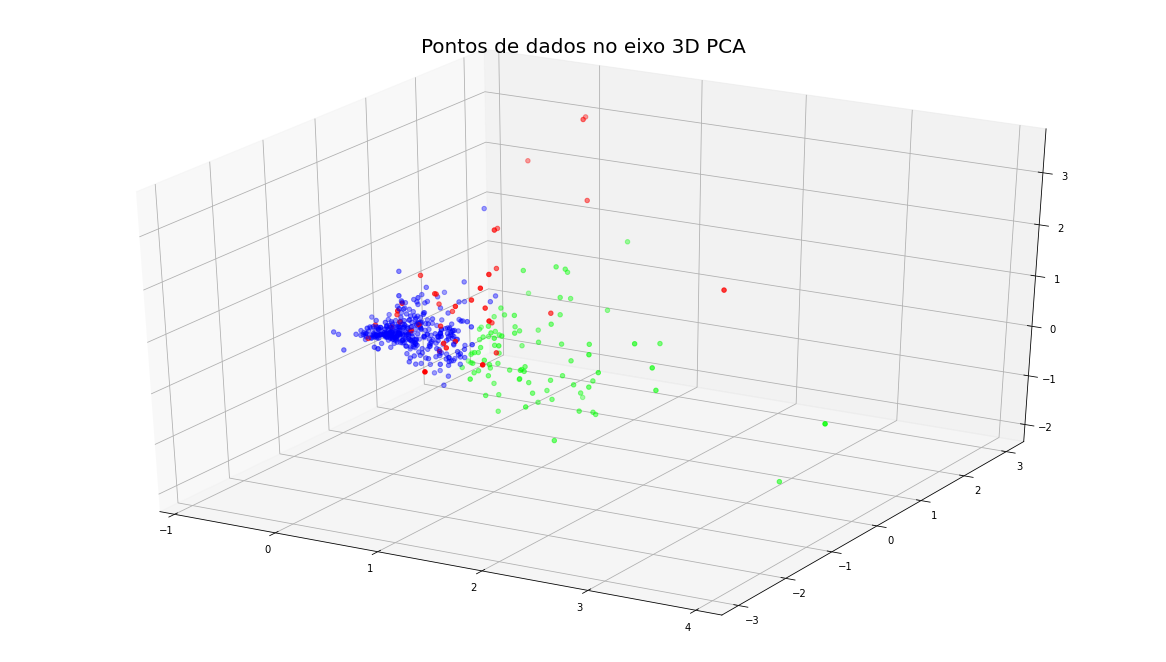

In [152]:
Kmm = KMeans(n_clusters=3)
plt.rcParams['figure.figsize'] = (16, 9)
clusters = Kmm.fit_predict(pca_fit)
cmhot = plt.get_cmap('brg')
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pca_fit[0], pca_fit[2], pca_fit[1],c=clusters,cmap=cmhot)
plt.title('Pontos de dados no eixo 3D PCA', fontsize=20)
plt.show()

Text(0, 0.5, '%Variança para cada valor de K')

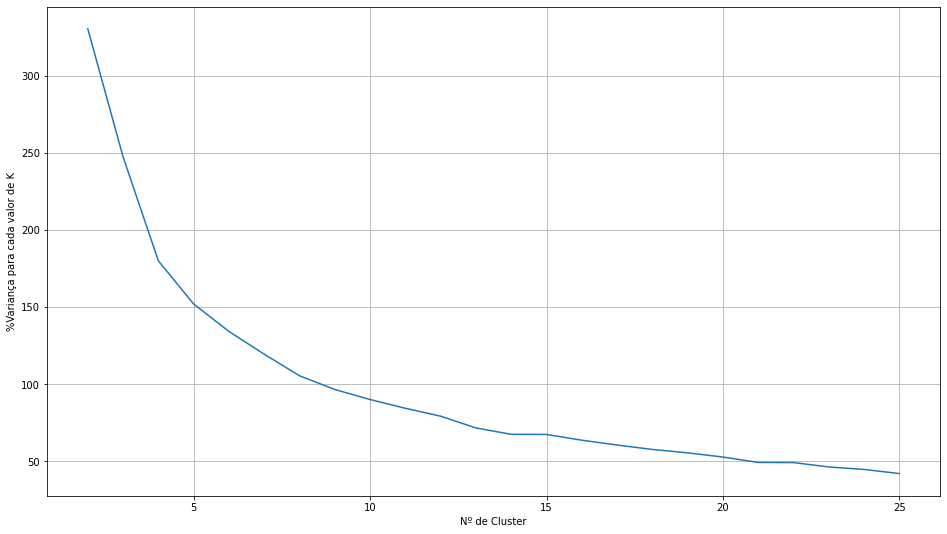

In [153]:
# O Elbow Method

TSS = []
for i in range(2,26):
    km = KMeans(n_clusters=i,random_state=0)
    km.fit(pca_fit)
    TSS.append(km.inertia_)
plt.plot(range(2,26),TSS,'-')
plt.grid(True)
plt.xlabel('Nº de Cluster')
plt.ylabel('%Variança para cada valor de K')

Para  n_clusters = 3 A média silhouette_score é : 0.4827958366900978
Para  n_clusters = 4 A média silhouette_score é : 0.5202181434231117
Para  n_clusters = 5 A média silhouette_score é : 0.3268956657509325
Para  n_clusters = 6 A média silhouette_score é : 0.32627472686930276
Para  n_clusters = 7 A média silhouette_score é : 0.3122208483319691
Para  n_clusters = 8 A média silhouette_score é : 0.331989200165328


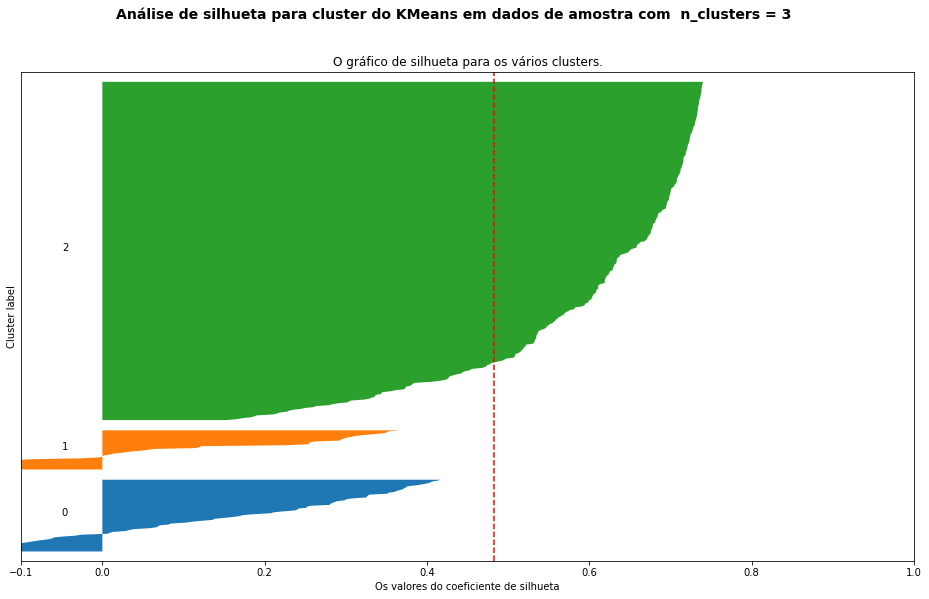

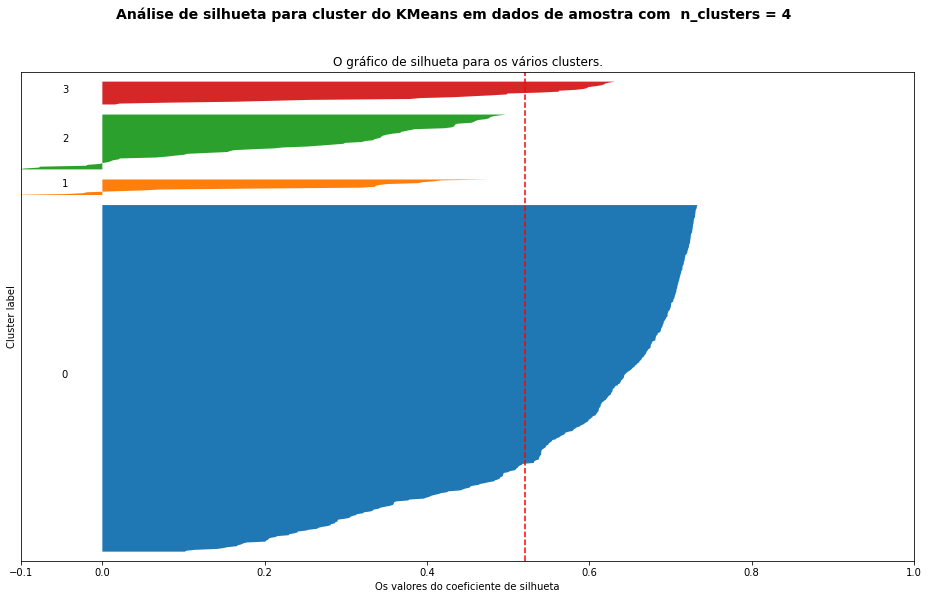

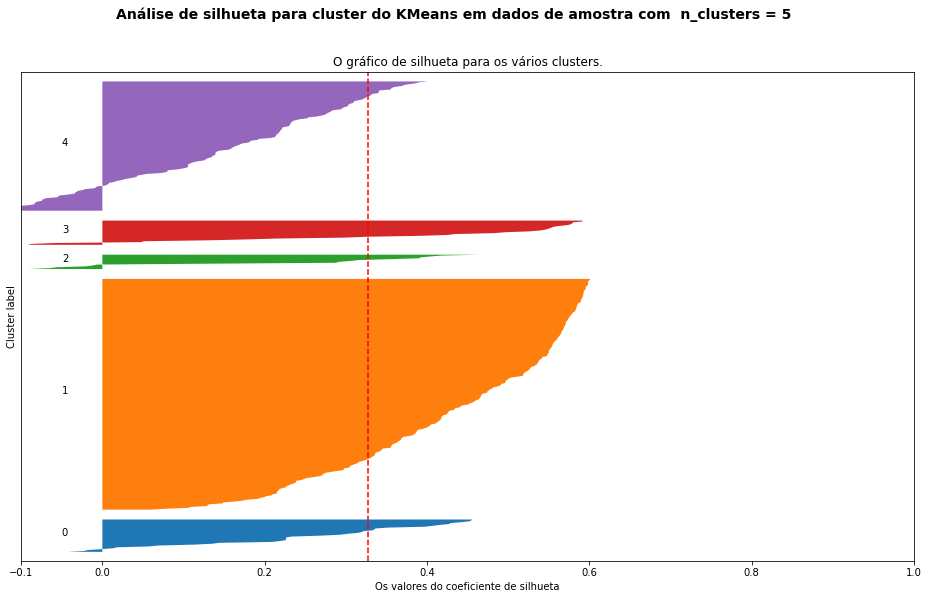

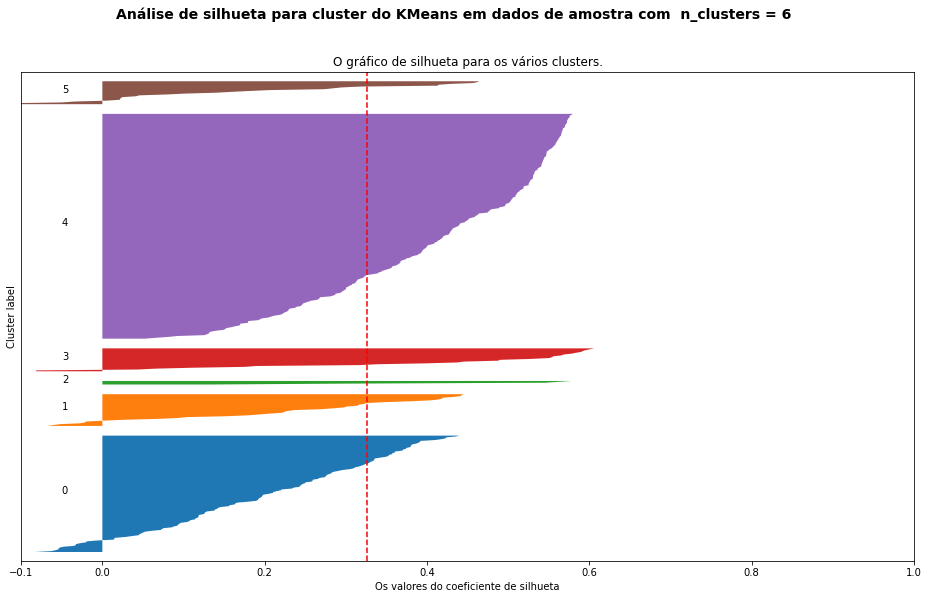

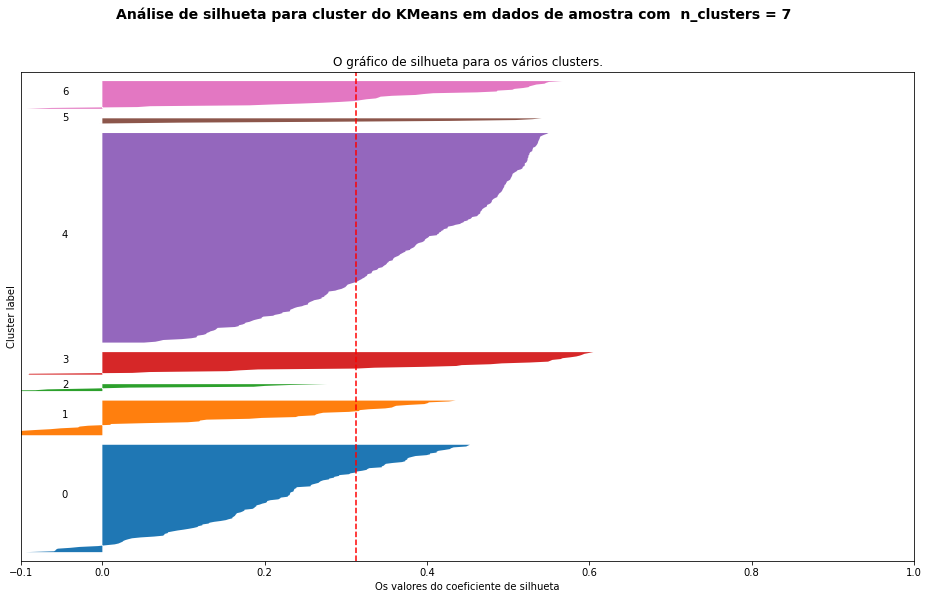

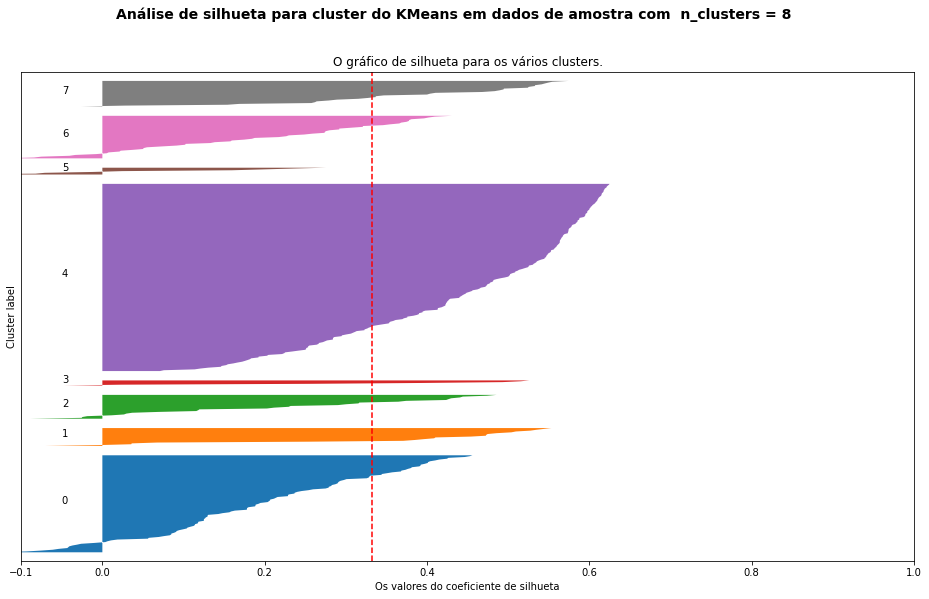

In [154]:
for n in [3,4,5,6,7,8]:
    ax1 = plt.figure().gca()
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(pca_fit) + (n + 1) * 10])
    km = KMeans(n_clusters=n,random_state=0)
    clusters = km.fit_predict(pca_fit)
    silhouette_avg = silhouette_score(pca_fit, clusters)
    print("Para  n_clusters =", n,
          "A média silhouette_score é :", silhouette_avg)
    silhouette_values = silhouette_samples(pca_fit, clusters)
    y_start = 10
    for i in range(n):
        ith_cluster = np.sort(silhouette_values[clusters==i])
        cluster_size = ith_cluster.shape[0]
        y_end = y_start + cluster_size 
        ax1.fill_betweenx(np.arange(y_start, y_end),
                          0, ith_cluster)
        ax1.text(-0.05, y_start + 0.5 * cluster_size, str(i))
        y_start = y_end + 10
    ax1.set_title("O gráfico de silhueta para os vários clusters.")
    ax1.set_xlabel("Os valores do coeficiente de silhueta")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.suptitle(("Análise de silhueta para cluster do KMeans em dados de amostra "
                  "com  n_clusters = %d" % n),
                 fontsize=14, fontweight='bold')
plt.show()

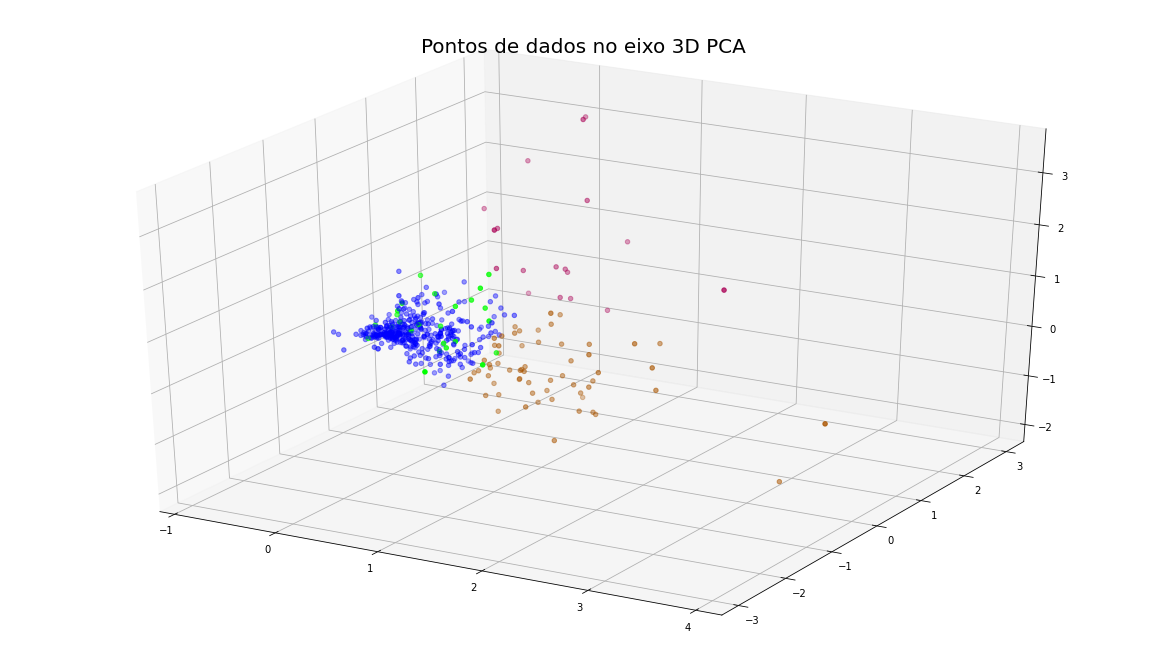

In [155]:
Kmeans_final = KMeans(n_clusters=4,random_state=0).fit(pca_fit)
df['cluster'] = Kmeans_final.labels_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pca_fit[0], pca_fit[2], pca_fit[1],c=df['cluster'],cmap=cmhot)
plt.title('Pontos de dados no eixo 3D PCA', fontsize=20)
plt.show()
# Gettings the books for each cluster
cl1_books = df[df.cluster == 0].mean()
cl2_books = df[df.cluster == 1].mean()
cl3_books = df[df.cluster == 2].mean()
cl4_books = df[df.cluster == 3].mean()
# Getting the users for each cluster
cl1_users = df[df.cluster == 0].index
cl2_users = df[df.cluster == 1].index
cl3_users = df[df.cluster == 2].index
cl4_users = df[df.cluster == 3].index

In [ ]:
result_isbn = []
def cluster_books_des(Ser):
    bks = pd.DataFrame(Ser).merge(books,left_index=True,right_on='ISBN',how='left')
    bks.rename(columns={0:'avg_score'},inplace=True)
    bks.sort_values(by='avg_score',ascending=False,inplace=True)
    print('Media de ano de Publicação:',int(bks['year_publisher'].median()))
    print('\nTop 5 Livros\n')
    Top5_books = bks.index[:5]
    for i,isbn in enumerate(Top5_books):
        print(str(i+1)+'.',bks.loc[isbn]['ISBN'])
        result_isbn.append(bks.loc[isbn]['ISBN'])
    Top5_authors = bks['author'].unique()[:5]
    print('\n--------------\n')
    print('\nTop 5 Autores\n')

    for i,auth in enumerate(Top5_authors):
        print(str(i+1)+'.',auth)
cluster_books_des(cl2_books)

df_result = pd.DataFrame(result_isbn, columns=['ISBN'])

Media de ano de Publicação: 1997

Top 5 Livros

1. cluster
2. 0385504209
3. 0345337662
4. 0671027360
5. 0316666343

--------------


Top 5 Autores

1. nan
2. Dan Brown
3. Anne Rice
4. Alice Sebold
5. Rich Shapero


In [ ]:
valid_qtd_mean = df_result.merge(ratings, on='ISBN')
v_qtd_livro = valid_qtd_mean.groupby('ISBN')['rating'].count()
v_media_livro = valid_qtd_mean.groupby('ISBN')['rating'].mean()

result_top5 =  df_result.merge(books, on='ISBN')
result_top5
v_qtd_livro
result_top5 = result_top5.set_index('ISBN')

#Criando coluna de media de avaliação e atribuindo o valor da media
result_top5['media_livro'] = v_media_livro

#Criando coluna de quantidade de avaliação e atribuindo na tabela user_rating
result_top5['qtd_rating'] = v_qtd_livro

#Retomado indice padrao
result_top5.reset_index(inplace=True)
result_top5

,ISBN,title,author,year_publisher,publisher,description,genres,media_livro,qtd_rating
0,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,NaN,NaN,4.551170,684
1,0345337662,Interview with the Vampire,Anne Rice,1993,Ballantine Books,NaN,NaN,3.535354,396
2,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star,NaN,NaN,3.730526,475
3,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",NaN,NaN,4.240088,908


In [ ]:
# plotando gráfico de barras verticais
trace0 = go.Bar(x=result_top5.title,
                y=result_top5.qtd_rating ,
                marker = {'color': '#00FF2b'},
                orientation='v'
              )

data = [trace0]

# criando layout
configuracoes_layout = go.Layout(title='Quantidade de Avaliação dos tops 5 Livros',
                   xaxis=dict(
                         titlefont=dict(
                                   size=40,
                                   color='lightgrey'),
                   tickangle=90),
                   yaxis={'title': 'livros'})

# figura

fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico
py.iplot(fig)

In [ ]:
data = [go.Bar(x=result_top5.title,
               y=result_top5.media_livro ,
               marker = {'color': 'lightblue',
                         'line': {'color': '#333',
                                 'width': 2}
                        },
               orientation='v',
               opacity= 0.7
              )
       ]

# layout
configuracoes_layout = go.Layout(title='Media de Avaliações dos livros',
                                 yaxis={'title':'Livros avaliados'},
                                 xaxis={'title': 'Media de avaliações dos livros'},
                                 # texto na barra de destaque
              
                                                                                              
                                )

# figura

fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico
py.iplot(fig, filename='Mes destaque de vendas')


Most Common Location: minneapolis, minnesota, usa

Mean Age: 29.36111111111111


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



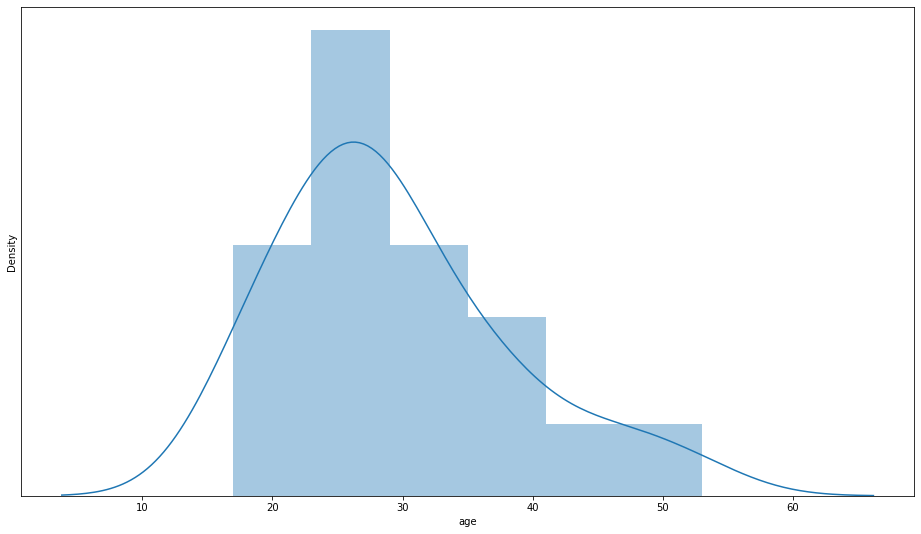

In [ ]:
def cluster_user_des(Ser):
    cl_user = users[users['user_id'].isin(list(Ser))]
    print('Most Common Location:',cl_user['location'].mode()[0])
    print('\nMean Age:',cl_user['age'].mean())
    sns.distplot(cl_user['age'])
    plt.yticks([])
cluster_user_des(cl1_users)